<a href="https://colab.research.google.com/github/Geckomonc/FundamentosDatos/blob/main/sesiones_practicas/sc_2_Geraldine_Acevedo_Restrepo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 2: Análisis Univariado, bivariado y multivariado</strong></span>
---
<p align="right">
  <a href="https://colab.research.google.com/#create=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [ ]:
nombre = input("📝 Ingresa tu nombre completo: ")
correo = input("📧 Ingresa tu correo electrónico: ")
cedula = input("🔢 Ingresa los últimos 4 dígitos de tu cédula: ")

📝 Ingresa tu nombre completo: Geraldine Acevedo Restrepo
📧 Ingresa tu correo electrónico: geraldine.acevedo@udea.edu.co
🔢 Ingresa los últimos 4 dígitos de tu cédula: 689211


## <span style="color:black;"><strong>Parte 1: Análisis Univariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 1: Cálculo de medidas de tendencia central</strong></span>

A partir de una muestra simulada de ingresos, calcula la **media, mediana y moda**, y luego a interpretarlas.

1. Usa el número base `528310` (debes reemplazarlo con los últimos 6 dígitos de tu documento de identificación).  
2. Con este número genera una semilla (`np.random.seed`) para que los resultados sean reproducibles.  
3. Los ingresos se simulan con una distribución normal:  
   - Media teórica: `(base % 10) + 2`  
   - Desviación estándar: `2`  
   - Tamaño de muestra: `30`  
4. Los valores negativos se reemplazan por cero (pues los ingresos no pueden ser negativos).  
5. Grafica tus resultados (ver imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e1.png" alt="sp_2_e1" width="900"  height="400">
</p>


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

base = 689211
ingresos = np.random.normal(base % 10 + 2, scale=2, size=30).round(1)
ingresos = np.clip(ingresos, 0,None)
ingresos

array([6.3, 2.4, 0.3, 4. , 2.9, 2.8, 3.2, 4.7, 0.4, 3.4, 3.2, 0.4, 4.5,
       2.1, 2.3, 0.5, 5.2, 3.6, 6.5, 6.5, 0.9, 2.4, 1.7, 0. , 4.6, 9.6,
       2.4, 4.2, 3.8, 7.1])

In [51]:
media = np.mean(ingresos)
mediana = np.median(ingresos)
moda = stats.mode(ingresos, keepdims=True)[0][0]

print(f"La media es: {media}")
print(f"La mediana es: {mediana}")
print(f"La moda es: {moda}")

La media es: 3.3966666666666665
La mediana es: 3.2
La moda es: 2.4


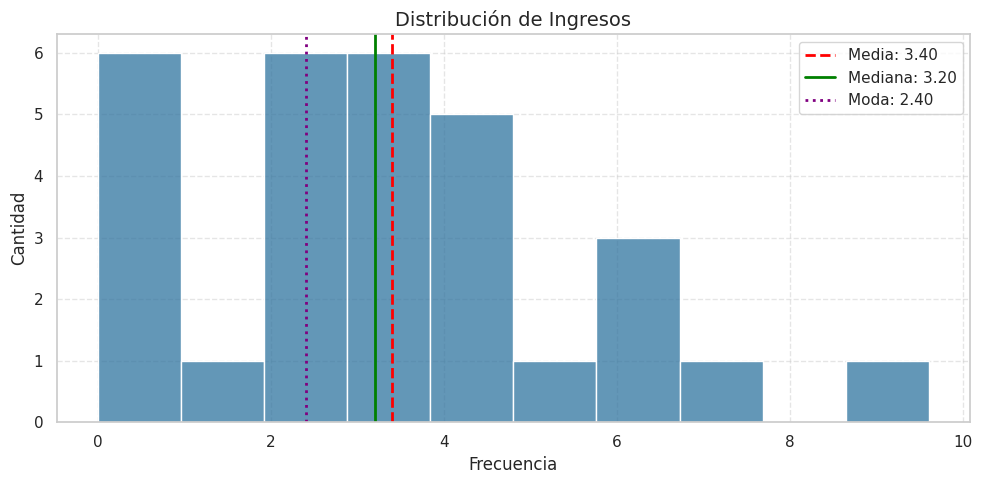

In [52]:
# Visualización
plt.figure(figsize=(10, 5))
sns.histplot(ingresos, bins=10, kde=False, color="#2F749F")

# Líneas de tendencia central
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='purple', linestyle=':', linewidth=2, label=f'Moda: {moda:.2f}')

# Estética
plt.title("Distribución de Ingresos", fontsize=14)
plt.xlabel("Frecuencia", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### <span style="color:#2F749F;"><strong>Ejercicio 2: Cálculo de medidas de dispersión</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza qué tan dispersos están los datos respecto a su media. Calcula:
1. Rango
2. Varianza
3. Desviación estándar
4. Coeficiente de variación
5. Genera una gráfica con los resultados obtenidos (ver imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e2.png" alt="sp_2_e2" width="900"  height="400">
</p>

Rango: 9.60
Varianza: 5.24
Desviación estándar: 2.29
Coef. de variación: 0.67


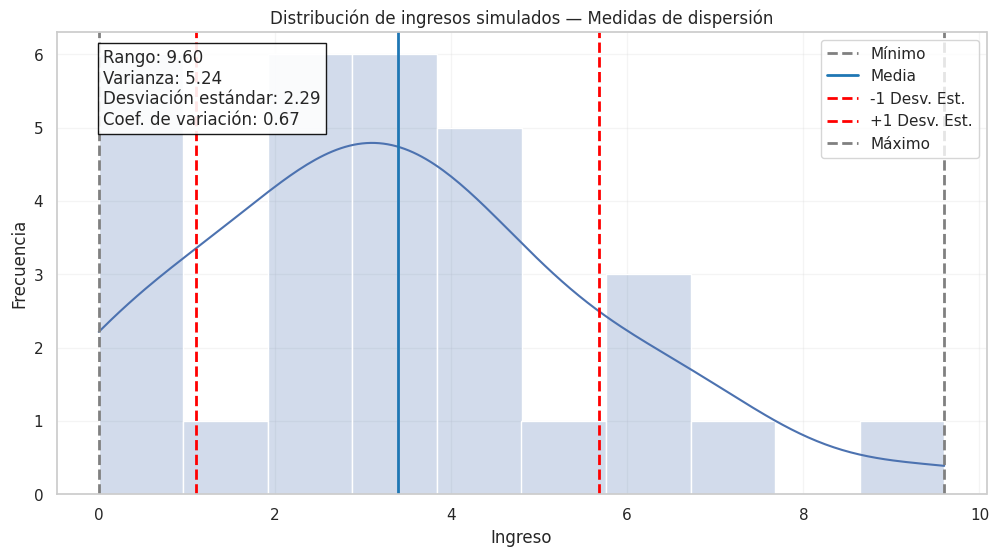

In [53]:
from matplotlib.lines import Line2D
# --- Medidas de dispersión (muestrales) ---
x_min, x_max = ingresos.min(), ingresos.max()
rango = x_max - x_min
media = ingresos.mean()
desv = np.std(ingresos, ddof=1)
var = np.var(ingresos, ddof=1)
cv = desv / media

print(f"Rango: {rango:.2f}")
print(f"Varianza: {var:.2f}")
print(f"Desviación estándar: {desv:.2f}")
print(f"Coef. de variación: {cv:.2f}")

# --- Gráfico estilo del ejemplo ---
plt.figure(figsize=(12,6))
sns.histplot(ingresos, bins=10, kde=True, stat="count",
             color="#4C72B0", alpha=0.25, edgecolor=None)

# Líneas verticales: min/max, media y ±1 desv. est.
plt.axvline(x_min, color="grey", linestyle="--", linewidth=2)
plt.axvline(x_max, color="grey", linestyle="--", linewidth=2)
plt.axvline(media, color="#1f77b4", linewidth=2)                  # media
plt.axvline(media - desv, color="red", linestyle="--", linewidth=2)
plt.axvline(media + desv, color="red", linestyle="--", linewidth=2)

plt.title("Distribución de ingresos simulados — Medidas de dispersión")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.2)

# Cuadro con las métricas
txt = (f"Rango: {rango:.2f}\n"
       f"Varianza: {var:.2f}\n"
       f"Desviación estándar: {desv:.2f}\n"
       f"Coef. de variación: {cv:.2f}")
plt.text(0.05, 0.80, txt, transform=plt.gca().transAxes,
         bbox=dict(facecolor="white", edgecolor="black", alpha=0.9))

# Leyenda con handles personalizados
handles = [
    Line2D([0],[0], color="grey", linestyle="--", lw=2, label="Mínimo"),
    Line2D([0],[0], color="#1f77b4", lw=2, label="Media"),
    Line2D([0],[0], color="red", linestyle="--", lw=2, label="-1 Desv. Est."),
    Line2D([0],[0], color="red", linestyle="--", lw=2, label="+1 Desv. Est."),
    Line2D([0],[0], color="grey", linestyle="--", lw=2, label="Máximo"),
]
plt.legend(handles=handles, loc="upper right", frameon=True)

plt.show()

### <span style="color:#2F749F;"><strong>Ejercicio 3: Cálculo de medidas de distribución</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza la distribución de los datos. Calcula:
1. Asimetría
2. Curtosis
3. Realiza la comparación con la distribución normal (ver la imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e3.png" alt="sp_2_e3" width="900"  height="400">
</p>



In [54]:
# importing
!pip install scipy


In [55]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Asimetría: 0.62
Curtosis: 0.19


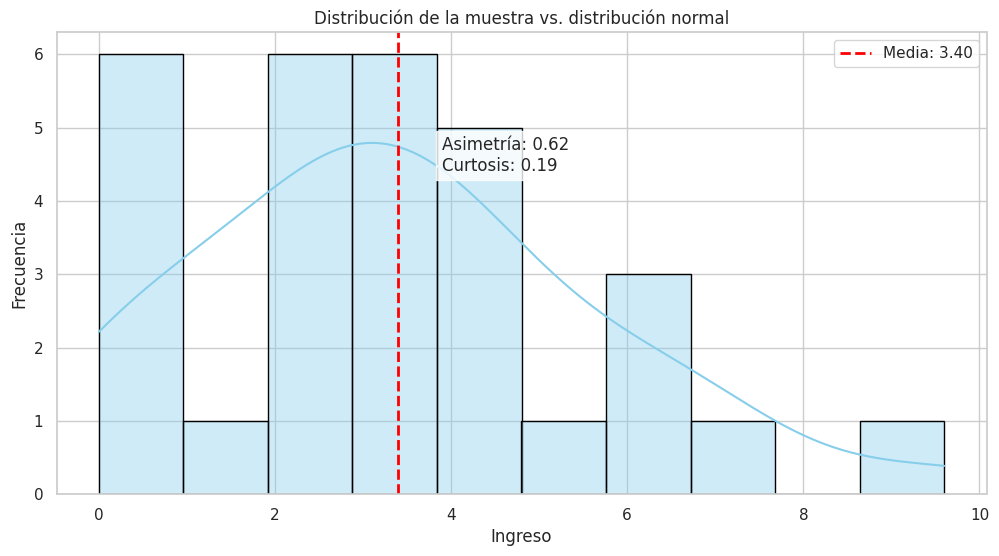

In [56]:
# --- Cálculos ---
media = ingresos.mean()
asimetria = stats.skew(ingresos)
curtosis = stats.kurtosis(ingresos)   # Fisher=True, normal=0

print(f"Asimetría: {asimetria:.2f}")
print(f"Curtosis: {curtosis:.2f}")

# --- Gráfico ---
plt.figure(figsize=(12,6))
sns.histplot(ingresos, bins=10, kde=True, color="skyblue", edgecolor="black", alpha=0.4)

# Línea de la media
plt.axvline(media, color="red", linestyle="--", linewidth=2, label=f"Media: {media:.2f}")

# Etiqueta con asimetría y curtosis
txt = (f"Asimetría: {asimetria:.2f}\n"
       f"Curtosis: {curtosis:.2f}")
plt.text(media+0.5, plt.ylim()[1]*0.7, txt, bbox=dict(facecolor="white", alpha=0.8))

# Títulos y ejes
plt.title("Distribución de la muestra vs. distribución normal")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.legend()

plt.show()

### <span style="color:#2F749F;"><strong>Ejercicio 4: Cálculo de medidas de percentiles</strong></span>

A partir de la muestra generada en el Ejercicio 1, calcula los percentiles de tus datos. Calcula:
1. Percentiles
2. Deciles
3. Cuartiles
4. Grafica los anteriores percentiles calculados, sobre la distribución de tus datos (ver la imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e4.png" alt="sp_2_e4" width="900"  height="400">
</p>


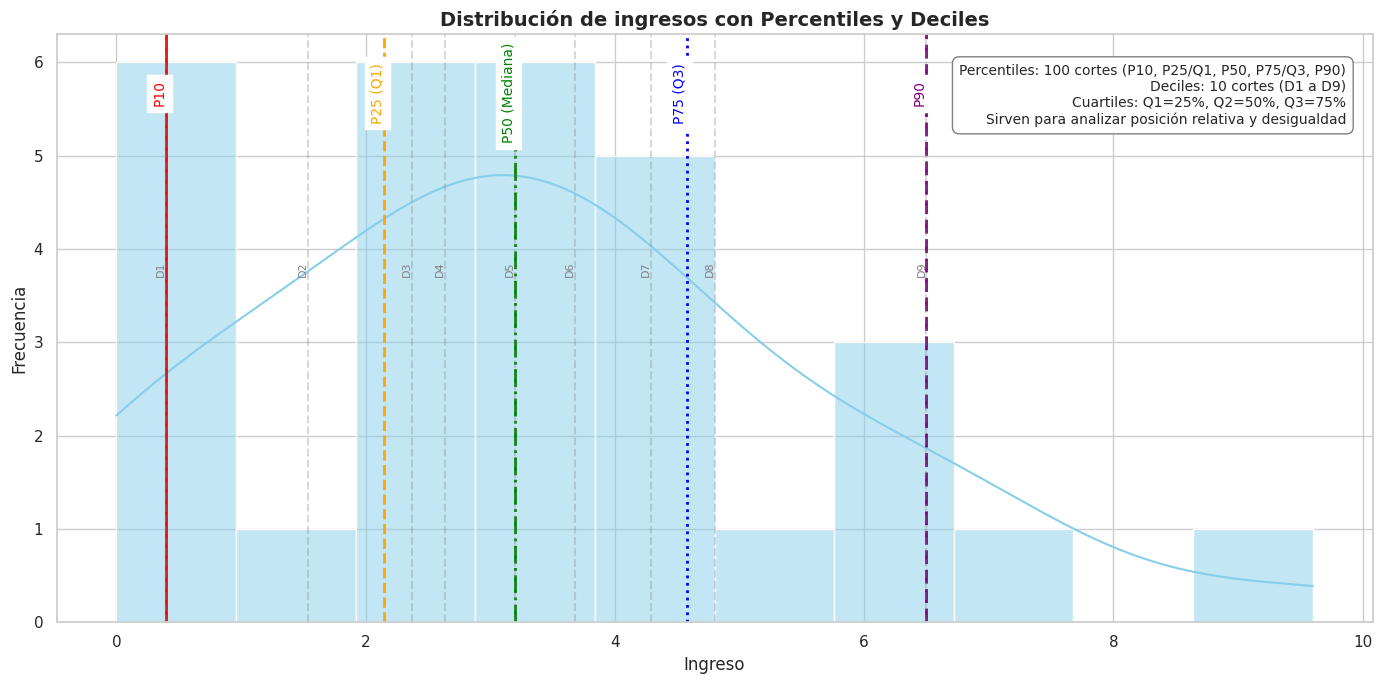

In [57]:
# Estilo visual
sns.set_theme(style="whitegrid")

# --- Cálculo de percentiles clave ---
percentiles = {
    'P10': {'valor': np.percentile(ingresos, 10), 'color': 'red', 'linestyle': '-'},
    'P25 (Q1)': {'valor': np.percentile(ingresos, 25), 'color': 'orange', 'linestyle': '--'},
    'P50 (Mediana)': {'valor': np.percentile(ingresos, 50), 'color': 'green', 'linestyle': '-.'},
    'P75 (Q3)': {'valor': np.percentile(ingresos, 75), 'color': 'blue', 'linestyle': ':'},
    'P90': {'valor': np.percentile(ingresos, 90), 'color': 'purple', 'linestyle': (0, (5, 2))}
}

# --- Cálculo de deciles (D1 a D9) ---
deciles = {f'D{i}': np.percentile(ingresos, i * 10) for i in range(1, 10)}

# --- Visualización ---
plt.figure(figsize=(14, 7))
sns.histplot(ingresos, kde=True, color='skyblue', bins=10)

# Líneas verticales para percentiles destacados
for etiqueta, props in percentiles.items():
    plt.axvline(props['valor'], color=props['color'], linestyle=props['linestyle'],
                linewidth=2)
    plt.text(props['valor'], plt.ylim()[1]*0.9, etiqueta,
             rotation=90, color=props['color'], fontsize=10,
             verticalalignment='center', horizontalalignment='right',
             backgroundcolor='white')

# Líneas más sutiles para deciles
for etiqueta, valor in deciles.items():
    plt.axvline(valor, color='gray', linestyle='--', alpha=0.3)
    plt.text(valor, plt.ylim()[1]*0.6, etiqueta,
             rotation=90, color='gray', fontsize=8,
             verticalalignment='center', horizontalalignment='right')

# Recuadro interpretativo
texto = (
    "Percentiles: 100 cortes (P10, P25/Q1, P50, P75/Q3, P90)\n"
    "Deciles: 10 cortes (D1 a D9)\n"
    "Cuartiles: Q1=25%, Q2=50%, Q3=75%\n"
    "Sirven para analizar posición relativa y desigualdad"
)
plt.text(0.98, 0.95, texto, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray'))

# Títulos y estilo
plt.title("Distribución de ingresos con Percentiles y Deciles", fontsize=14, fontweight='bold')
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

## <span style="color:black;"><strong>Parte 2: Análisis Bivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 5: Análisis de correlación</strong></span>

En esta segunda parte, genera **dos variables** a partir de tú número de cédula y realiza un análisis **bivariado** para calcular la relación entre ellas.

1. Use los **6 últimos dígitos** de su cédula como base (similar al Ejercicio 1).  
2. Genere dos variables aleatorias (ejemplo: `ingresos` y `gastos`) con distribución normal, usando esa base como **semilla reproducible**.  
3. Calcule los coeficientes de correlación de **Pearson** y **Spearman**.
4. Grafique las variables analizadas (ver la imagen de ejemplo)
5. Interprete los resultados.  

<p align="center">
    <img src="imgs\sp_2_e5.png" alt="sp_2_e5" width="900"  height="400">
</p>

Coeficiente de Pearson: 0.068
Coeficiente de Spearman: 0.050


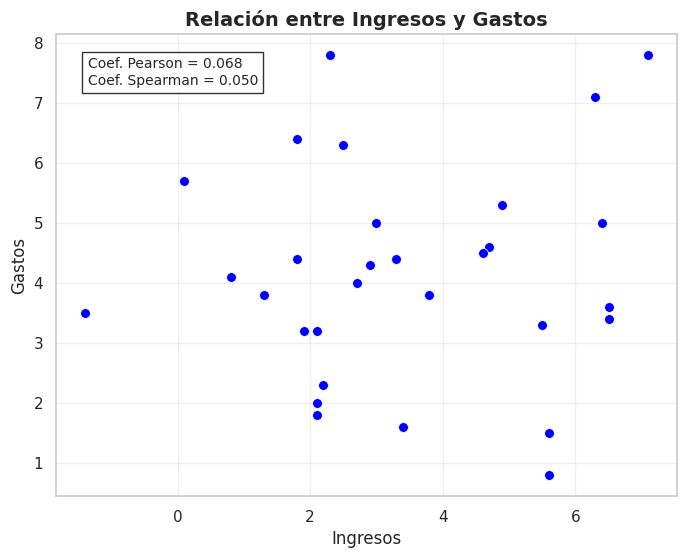

In [ ]:
base = 689211
np.random.seed(base)

# --- Generar dos variables (ej: ingresos y gastos) ---
n = 30
ingresos = np.random.normal(loc=base % 10 + 2, scale=2, size=n).round(1)
gastos   = np.random.normal(loc=base % 10 + 3, scale=2, size=n).round(1)

# --- Correlaciones ---
pearson = stats.pearsonr(ingresos, gastos)[0]
spearman = stats.spearmanr(ingresos, gastos)[0]

print(f"Coeficiente de Pearson: {pearson:.3f}")
print(f"Coeficiente de Spearman: {spearman:.3f}")

# --- Gráfico ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=ingresos, y=gastos, color="blue", s=50)

plt.title("Relación entre Ingresos y Gastos", fontsize=14, fontweight="bold")
plt.xlabel("Ingresos")
plt.ylabel("Gastos")
plt.grid(True, alpha=0.3)

# Recuadro con coeficientes
texto = f"Coef. Pearson = {pearson:.3f}\nCoef. Spearman = {spearman:.3f}"
plt.text(0.05, 0.95, texto, transform=plt.gca().transAxes,
         bbox=dict(facecolor="white", edgecolor="black", alpha=0.8),
         fontsize=10, verticalalignment="top")

plt.show()


- Tanto Pearson como Spearman están muy cerca de 0, esto lo que significa  es que no hay una relación lineal clara entre ingresos y gastos en la muestra. O sea, cuando cambian los ingresos, no necesariamente cambian los gastos en la misma dirección.

### <span style="color:#2F749F;"><strong>Ejercicio 6: Chi-Cuadrado</strong></span>

En esta parte, analiza si existe **asociación estadística** entre dos variables categóricas simuladas a partir de tu número de cédula.

1. Usa los **6 últimos dígitos** de tu cédula como base para generar una semilla reproducible.
2. Simula una muestra de **60 personas** con dos variables categóricas:
   - `Nivel educativo`: Básico, Medio, Superior.
   - `Acceso a internet`: Sí, No.
3. Crea una **tabla de contingencia** entre ambas variables.
4. Aplica la **prueba de Chi cuadrado de independencia**.
5. Visualiza la distribución conjunta con un mapa de calor (ver la imagen de con la información de ejemplo).
6. Interpreta el resultado.

<p align="center">
    <img src="imgs\sp_2_e6.png" alt="sp_2_e6" width="900"  height="700">
</p>

Tabla de contingencia:
Acceso a internet  No  Sí
Nivel educativo          
Básico              4  17
Medio               8  21
Superior            4   6

Chi² = 1.55, p-valor = 0.462, grados de libertad = 2

Frecuencias esperadas:
Acceso a internet        No         Sí
Nivel educativo                       
Básico             5.600000  15.400000
Medio              7.733333  21.266667
Superior           2.666667   7.333333


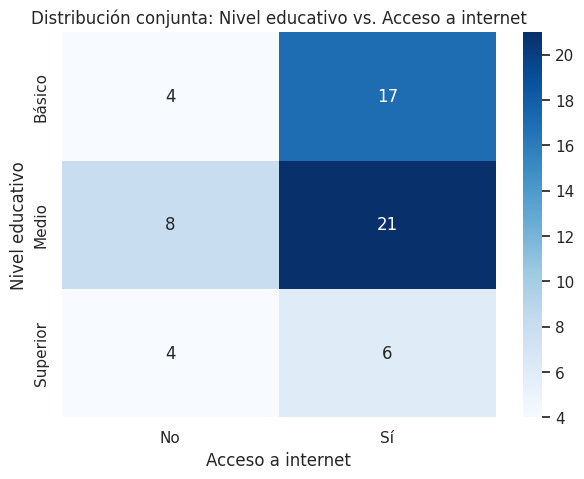

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

np.random.seed(base)

# --- Simular datos ---
n = 60
niveles = ["Básico", "Medio", "Superior"]
internet = ["No", "Sí"]

nivel_educativo = np.random.choice(niveles, size=n, p=[0.4, 0.35, 0.25])  # ejemplo de distribución
acceso_internet = np.random.choice(internet, size=n, p=[0.3, 0.7])        # mayoría con acceso

# DataFrame
df = pd.DataFrame({"Nivel educativo": nivel_educativo, "Acceso a internet": acceso_internet})

# --- Tabla de contingencia ---
tabla = pd.crosstab(df["Nivel educativo"], df["Acceso a internet"])
print("Tabla de contingencia:")
print(tabla)

# --- Prueba Chi-cuadrado ---
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"\nChi² = {chi2:.2f}, p-valor = {p:.3f}, grados de libertad = {dof}")
print("\nFrecuencias esperadas:")
print(pd.DataFrame(expected, index=tabla.index, columns=tabla.columns))

# --- Heatmap ---
plt.figure(figsize=(7,5))
sns.heatmap(tabla, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Distribución conjunta: Nivel educativo vs. Acceso a internet")
plt.ylabel("Nivel educativo")
plt.xlabel("Acceso a internet")
plt.show()

Hipótesis:

H0: No existe asociación entre nivel educativo y acceso a internet (son independientes).

H1: Sí existe asociación entre nivel educativo y acceso a internet.

Decisión:

Como p = 0.462 > 0.05, no se rechaza H₀.

Esto significa que no hay evidencia estadística suficiente para afirmar que el acceso a internet dependa del nivel educativo en la muestra.

Visualmente en el heatmap:

Aunque los niveles medio y básico parecen tener más acceso que el nivel superior, esas diferencias no son significativas estadísticamente.